In [16]:
# Importing essential libraries for data manipulation and model training
import pandas as pd
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report


In [17]:
# Load the dataset from 'Samadhi.csv'. Ensure the file is in the same directory or provide the full path.
data = pd.read_csv("Samadhi.csv")

# Display the first few rows of the data to verify loading
data.head()




,Age,Gender,Lifestyle,Habit 01,Habit 02,Habit 03,Habit 04,Habit 05,Habit 06,Recommendation
0,15,Male,School Student,Floss,Be Grateful,Sleep at least 8 hours,Workout,Eat More Vegetables and Fruits,Brush Teeth in the Morning,Breathing Exercises
1,15,Male,School Student,Meditate,No Sweets,Pray,Take a walk outside,Read a book for 30 minutes,Brush Teeth in the Morning,Balanced Diet
2,15,Male,School Student,Meditate For At Least 10 Minutes,No Screens After 10 pm,Duolingo,Floss,Duolingo,Pray,Practice gratitude
3,15,Male,School Student,Floss,Brush Teeth in the Morning,Take Vitamins,Go to gym,Wake up early,Write In Journal,Fiber-rich diet
4,15,Male,School Student,Be Grateful,No Soda,Duolingo,Sleep at least 8 hours,Take Vitamins,Duolingo,Breathing Exercises


In [18]:
# Define features (age, gender, lifestyle, and existing habits) and target (recommendation)
X = data[["Age", "Gender", "Lifestyle", "Habit 01", "Habit 02", "Habit 03", "Habit 04", "Habit 05", "Habit 06"]]
y = data["Recommendation"]  # Set 'Recommendation' as the target

# Display feature and target data shapes to confirm loading
print("Feature Data Shape:", X.shape)
print("Target Data Shape:", y.shape)




Feature Data Shape: (1021, 9)
Target Data Shape: (1021,)


In [19]:
# One-hot encode categorical variables to prepare data for model training
X = pd.get_dummies(X, columns=["Gender", "Lifestyle", "Habit 01", "Habit 02", "Habit 03", "Habit 04", "Habit 05", "Habit 06"])

# Check the shape after encoding to ensure consistency with the model
print("Encoded Feature Data Shape:", X.shape)



Encoded Feature Data Shape: (1021, 355)


In [20]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Initialize RandomForest with tuned parameters
rf_model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_





C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


In [22]:
# Train the best model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest Classifier with tuned parameters
best_random_forest = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the Random Forest Classifier
best_random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_random_forest.predict(X_test)

# Evaluate the model
print("Random Forest Classifier (Tuned):")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))




Random Forest Classifier (Tuned):
Accuracy: 0.4
Classification Report:
                                          precision    recall  f1-score   support

                Avoid excessive alcohol       0.44      0.80      0.57         5
                          Avoid smoking       0.82      0.64      0.72        14
                          Balanced Diet       0.84      1.00      0.91        21
Breaks from screens and digital devices       0.00      0.00      0.00         4
                    Breathing Exercises       0.13      1.00      0.23        10
                     Consume probiotics       0.00      0.00      0.00         1
                               Crafting       0.00      0.00      0.00         4
               Deep breathing exercises       0.00      0.00      0.00         3
                  Drink plenty of water       0.56      1.00      0.71        10
                        Fiber-rich diet       0.00      0.00      0.00         3
                    Learning new ski

C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

In [23]:
# Get the best model found by GridSearchCV
best_model = grid_search.best_estimator_



In [24]:
# Save the trained model using pickle for future use in the recommendation system
with open("best_recommendation_model.pkl", "wb") as f:
    pickle.dump(best_random_forest, f)
print("Model saved as 'best_recommendation_model.pkl'")




Model saved as 'best_recommendation_model.pkl'


In [25]:
# (Optional) Load the model to verify it works correctly
with open("best_recommendation_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Check if loaded model is same as best model
sample_pred = loaded_model.predict(X_test[:5])
print("Sample Predictions from Loaded Model:", sample_pred)



Sample Predictions from Loaded Model: ['Avoid smoking' 'Spend time outdoors' 'Spend time outdoors' 'Walking'
 'Breathing Exercises']


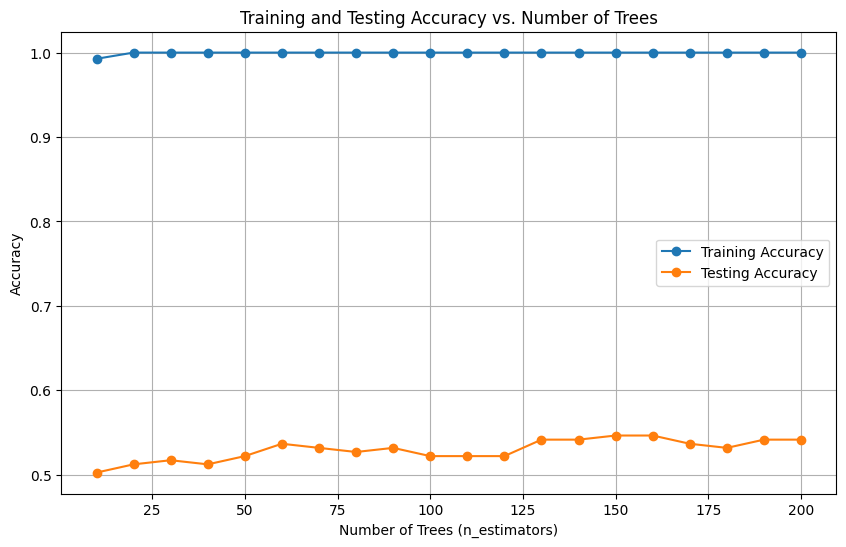

In [15]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming data is already loaded and preprocessed
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model with different numbers of trees and track accuracy
train_accuracies = []
test_accuracies = []

# Hyperparameter for the number of trees
n_estimators_range = range(10, 201, 10)

for n in n_estimators_range:
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)

    # Calculate accuracy on training and test sets
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))

    # Store the accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_accuracies, label="Training Accuracy", marker="o")
plt.plot(n_estimators_range, test_accuracies, label="Testing Accuracy", marker="o")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.title("Training and Testing Accuracy vs. Number of Trees")
plt.legend()
plt.grid()
plt.show()


In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [29]:
print(X.columns)



Index(['Age', 'Gender_Female', 'Gender_Male', 'Lifestyle_Content creator',
       'Lifestyle_Freelancer', 'Lifestyle_Housewife',
       'Lifestyle_School Student', 'Lifestyle_Uni Student', 'Lifestyle_Worker',
       'Habit 01_Affirmations',
       ...
       'Habit 06_Unclutter', 'Habit 06_Wake up early',
       'Habit 06_Walk 10,000 Steps', 'Habit 06_Watch a TED talk',
       'Habit 06_Weekly brunch with friends',
       'Habit 06_Weekly social media detox', 'Habit 06_Workout',
       'Habit 06_Write In Journal',
       'Habit 06_Write Three Positive Things About Today', 'Habit 06_Yoga'],
      dtype='object', length=355)


In [31]:
existing_columns = [col for col in ["Gender", "Lifestyle", "Habit 01", "Habit 02"] if col in X.columns]
X_encoded = pd.get_dummies(X, columns=existing_columns)


In [32]:
# Verify the columns in the dataset
print("Available columns in the dataset:", X.columns)

# Perform one-hot encoding for the existing columns
existing_columns = [col for col in ["Gender", "Lifestyle", "Habit 01", "Habit 02"] if col in X.columns]
if existing_columns:
    X_encoded = pd.get_dummies(X, columns=existing_columns)
    print("One-hot encoding completed. Encoded data shape:", X_encoded.shape)
else:
    print("No columns found for encoding.")


Available columns in the dataset: Index(['Age', 'Gender_Female', 'Gender_Male', 'Lifestyle_Content creator',
       'Lifestyle_Freelancer', 'Lifestyle_Housewife',
       'Lifestyle_School Student', 'Lifestyle_Uni Student', 'Lifestyle_Worker',
       'Habit 01_Affirmations',
       ...
       'Habit 06_Unclutter', 'Habit 06_Wake up early',
       'Habit 06_Walk 10,000 Steps', 'Habit 06_Watch a TED talk',
       'Habit 06_Weekly brunch with friends',
       'Habit 06_Weekly social media detox', 'Habit 06_Workout',
       'Habit 06_Write In Journal',
       'Habit 06_Write Three Positive Things About Today', 'Habit 06_Yoga'],
      dtype='object', length=355)
No columns found for encoding.


In [34]:
# Reload the dataset to ensure integrity
data = pd.read_csv("Samadhi.csv")
print(data.columns)


Index(['Age', 'Gender', 'Lifestyle', 'Habit 01', 'Habit 02', 'Habit 03',
       'Habit 04', 'Habit 05', 'Habit 06', 'Recommendation'],
      dtype='object')


In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [36]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_model, X, y, cv=5)
print("Mean CV Accuracy:", cv_scores.mean())


C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Mean CV Accuracy: 0.5436154949784792


In [37]:
from sklearn.feature_selection import RFE
selector = RFE(best_model, n_features_to_select=5)
selector.fit(X, y)


RFE(estimator=RandomForestClassifier(min_samples_split=5, random_state=42),
    n_features_to_select=5)

C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

Classification Report:
                                          precision    recall  f1-score   support

                Avoid excessive alcohol       0.45      1.00      0.62         5
                          Avoid smoking       0.91      0.71      0.80        14
                          Balanced Diet       0.95      1.00      0.98        21
Breaks from screens and digital devices       1.00      0.75      0.86         4
                    Breathing Exercises       0.30      1.00      0.47        10
                     Consume probiotics       0.00      0.00      0.00         1
                               Crafting       0.00      0.00      0.00         4
               Deep breathing exercises       0.00      0.00      0.00         3
                  Drink plenty of water       0.62      1.00      0.77        10
                        Fiber-rich diet       0.67      0.67      0.67         3
                    Learning new skills       0.00      0.00      0.00         2
   

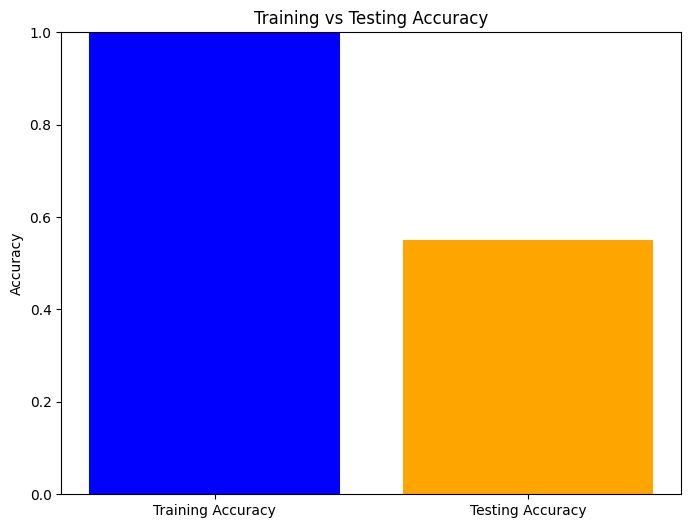

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_auc_score

# Predict on test data
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))

# Compute ROC-AUC score
try:
    roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class="ovr")
    print("ROC-AUC Score:", roc_auc)
except ValueError as e:
    print("Error in computing ROC-AUC:", e)

# Training and testing accuracy
train_accuracy = best_model.score(X_train, y_train)
test_accuracy = best_model.score(X_test, y_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate Chart: Training vs Testing Accuracy
plt.figure(figsize=(8, 6))
plt.bar(['Training Accuracy', 'Testing Accuracy'], [train_accuracy, test_accuracy], color=['blue', 'orange'])
plt.title('Training vs Testing Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()



C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

Classification Report:
                                          precision    recall  f1-score   support

                Avoid excessive alcohol       0.45      1.00      0.62         5
                          Avoid smoking       0.91      0.71      0.80        14
                          Balanced Diet       0.95      1.00      0.98        21
Breaks from screens and digital devices       1.00      0.75      0.86         4
                    Breathing Exercises       0.30      1.00      0.47        10
                     Consume probiotics       0.00      0.00      0.00         1
                               Crafting       0.00      0.00      0.00         4
               Deep breathing exercises       0.00      0.00      0.00         3
                  Drink plenty of water       0.62      1.00      0.77        10
                        Fiber-rich diet       0.67      0.67      0.67         3
                    Learning new skills       0.00      0.00      0.00         2
   

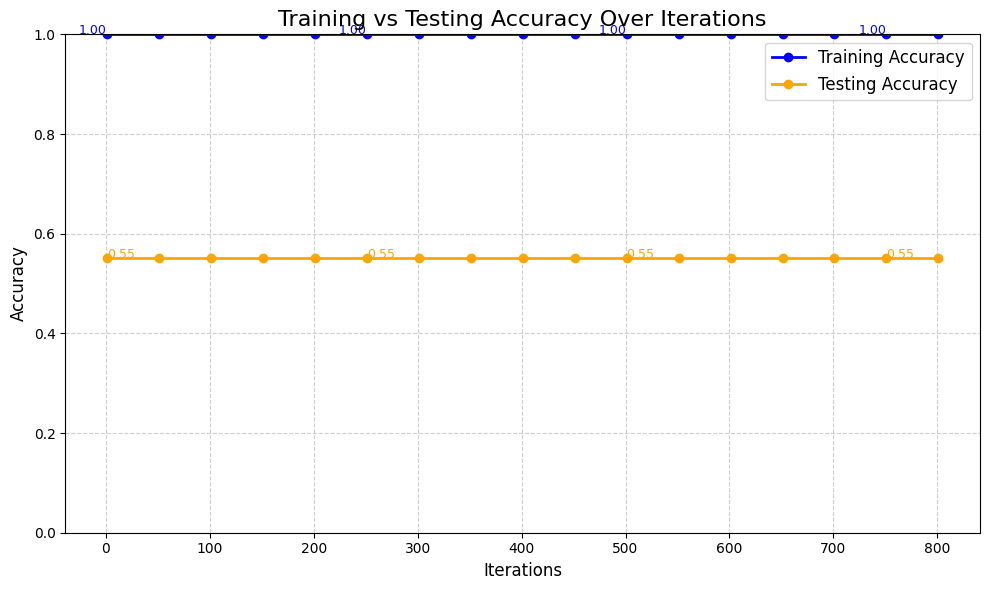

In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Predict on test data
y_pred = best_model.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))

# Training and testing accuracy over iterations
iterations = list(range(1, len(X_train) + 1, 50))  # Reduce the number of displayed iterations
train_accuracies = []
test_accuracies = []

for i in iterations:
    train_accuracy = best_model.score(X_train, y_train)
    test_accuracy = best_model.score(X_test, y_test)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Generate Line Chart
plt.figure(figsize=(10, 6))
plt.plot(iterations, train_accuracies, label="Training Accuracy", marker='o', markersize=6, linewidth=2, color='blue')
plt.plot(iterations, test_accuracies, label="Testing Accuracy", marker='o', markersize=6, linewidth=2, color='orange')

# Add data point annotations for key points
for i, (train, test) in enumerate(zip(train_accuracies, test_accuracies)):
    if i % 5 == 0:  # Annotate every 5th point
        plt.text(iterations[i], train, f"{train:.2f}", fontsize=9, ha='right', color='blue')
        plt.text(iterations[i], test, f"{test:.2f}", fontsize=9, ha='left', color='orange')

# Customize the chart
plt.title("Training vs Testing Accuracy Over Iterations", fontsize=16)
plt.xlabel("Iterations", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0, 1)  # Ensure chart spans the full accuracy range
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Show the chart
plt.show()


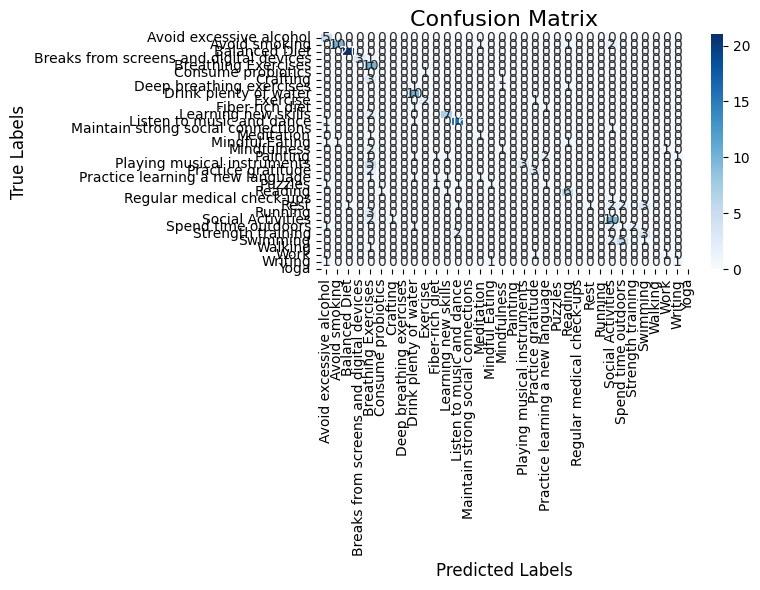

In [44]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.tight_layout()
plt.show()


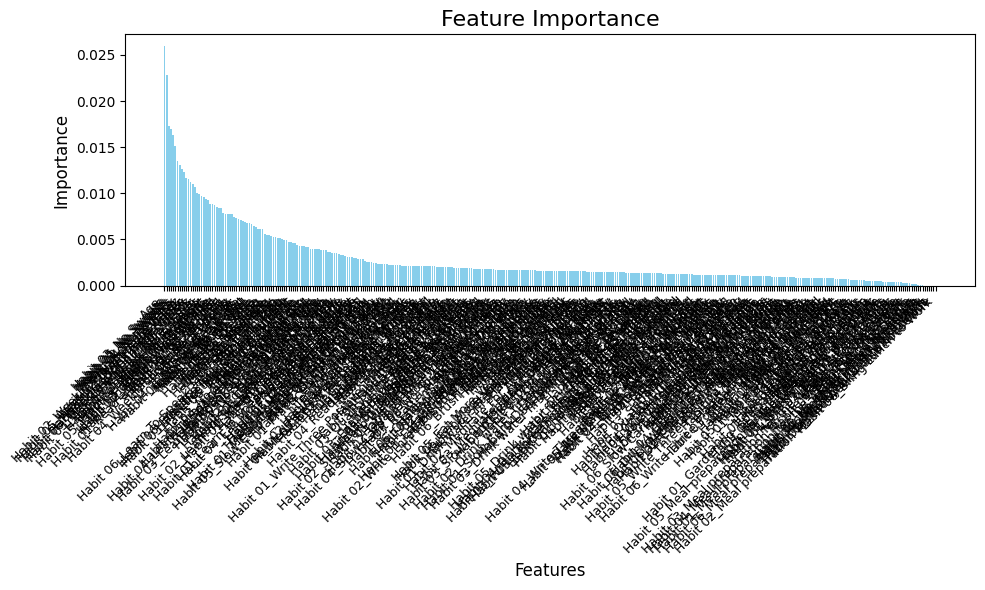

In [45]:
import numpy as np

# Extract feature importances
feature_importances = best_model.feature_importances_
features = X.columns

# Sort the features by importance
sorted_idx = np.argsort(feature_importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_idx)), feature_importances[sorted_idx], align="center", color="skyblue")
plt.xticks(range(len(sorted_idx)), features[sorted_idx], rotation=45, ha="right", fontsize=9)
plt.title("Feature Importance", fontsize=16)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Importance", fontsize=12)
plt.tight_layout()
plt.show()


In [46]:
from sklearn.metrics import precision_recall_curve

# Compute precision-recall curve
y_proba = best_model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', color='green', linewidth=2)
plt.title("Precision-Recall Curve", fontsize=16)
plt.xlabel("Recall", fontsize=12)
plt.ylabel("Precision", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


ValueError: multiclass format is not supported

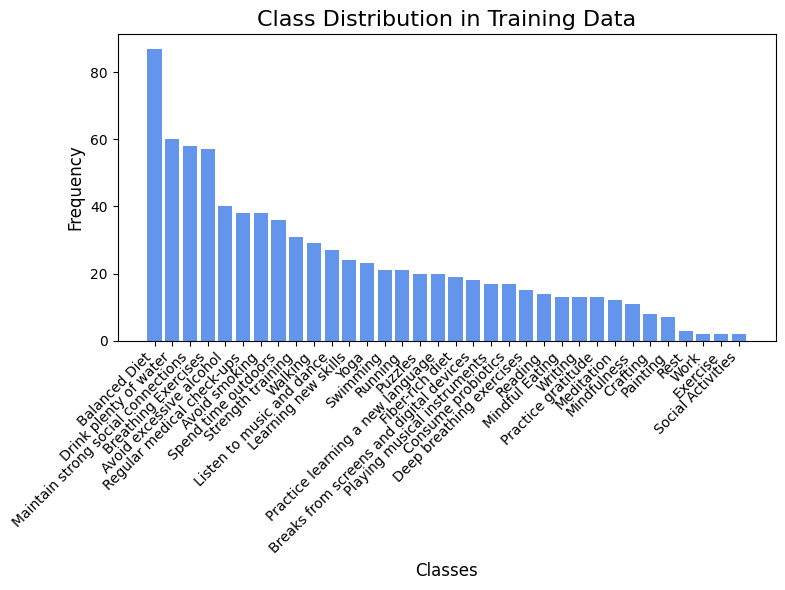

In [47]:
# Plot class distribution
plt.figure(figsize=(8, 6))
plt.bar(y_train.value_counts().index, y_train.value_counts().values, color='cornflowerblue')
plt.title("Class Distribution in Training Data", fontsize=16)
plt.xlabel("Classes", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.tight_layout()
plt.show()


In [48]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")  # Diagonal line
plt.title("Receiver Operating Characteristic (ROC) Curve", fontsize=16)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


ValueError: multiclass format is not supported

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (34,) and arg 1 with shape (33,).

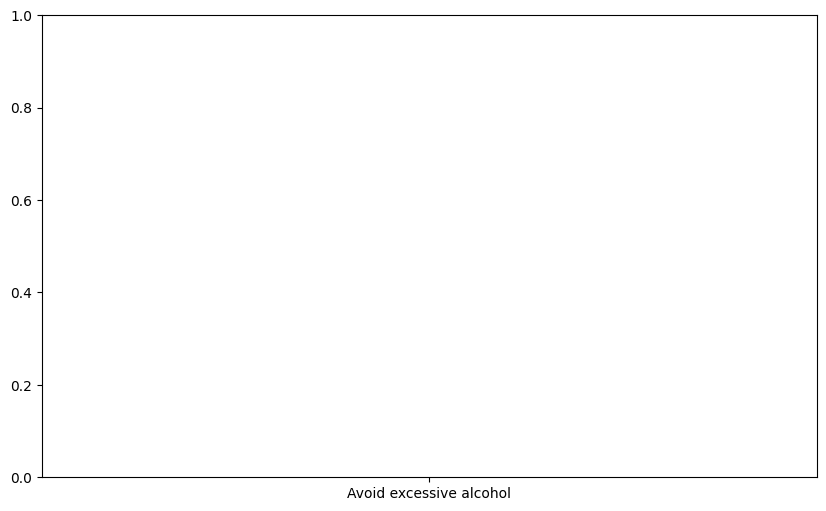

In [49]:
# Compute per-class accuracy
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
class_accuracies = np.diag(cm_normalized)

# Plot per-class accuracy
plt.figure(figsize=(10, 6))
plt.bar(best_model.classes_, class_accuracies, color='teal')
plt.title("Per-Class Accuracy", fontsize=16)
plt.xlabel("Classes", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.tight_layout()
plt.show()
